![Cloud-First](../figures/CloudFirst.png) 


# SIT742: Big Data Analytics 
**(Module: Big Data Analytics)**

---
- Materials in this module include resources collected from various open-source online repositories.
- You are free to use, change and distribute this package.
- If you found any issue/bug for this document, please submit an issue at [tulip-lab/sit742](https://github.com/tulip-lab/sit742/issues)


Prepared by **SIT742 Teaching Team**

---


## Session 5B: Arima

**The purpose of this session is to illustrate**

1. How to use Arima for Time Series Prediction.

** References and additional reading and resources**
-[Another ARIMA Tutorial](https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/) 

In [ ]:
!pip install "statsmodels==0.11.1"

## Plot the time series

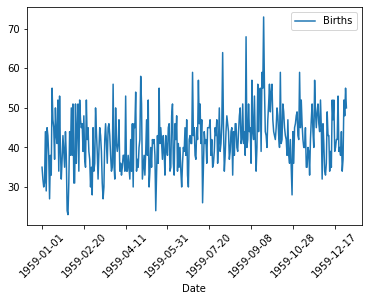

In [1]:
from pandas import read_csv
from matplotlib import pyplot

data ="https://github.com/tulip-lab/sit742/raw/master/Jupyter/data/timeseries-data.txt"
series = read_csv(data, header=0, index_col=0)
series.plot(rot=45)
pyplot.show()

## Fit the series with Arima model and print out the prediction / conficence interval

In [2]:
from pandas import read_csv
from statsmodels.tsa.arima.model import ARIMA

# load dataset
series = read_csv(data, header=0, index_col=0, parse_dates=True, squeeze=True)

# split into train and test sets
X = series.values
X = X.astype('float32')
size = len(X) - 1
train, test = X[0:size], X[size:]

# fit an ARIMA model
model = ARIMA(train, order=(5,1,1))
model_fit = model.fit()
# forecast
result = model_fit.get_forecast()

# summarize forecast and confidence intervals
print('Expected: %.3f' % result.predicted_mean)
print('Forecast: %.3f' % test[0])
print('Standard Error: %.3f' % result.se_mean)
ci = result.conf_int(0.05)
print('95%% Interval: %.3f to %.3f' % (ci[0,0], ci[0,1]))

Expected: 45.149
Forecast: 50.000
Standard Error: 7.009
95% Interval: 31.413 to 58.886


## Predict the time series by using walk-forward validation and Print out the RMSE

predicted=43.016047, expected=51.000000
predicted=46.506964, expected=41.000000
predicted=45.619679, expected=44.000000
predicted=44.652277, expected=38.000000
predicted=42.058430, expected=68.000000
predicted=49.255859, expected=40.000000
predicted=47.877755, expected=42.000000
predicted=43.871346, expected=51.000000
predicted=47.121732, expected=44.000000
predicted=47.181009, expected=45.000000
predicted=48.670808, expected=36.000000
predicted=42.238475, expected=57.000000
predicted=46.473183, expected=44.000000
predicted=46.752733, expected=42.000000
predicted=44.089722, expected=53.000000
predicted=46.358504, expected=42.000000
predicted=45.809913, expected=34.000000
predicted=44.533053, expected=40.000000
predicted=42.008302, expected=56.000000
predicted=45.542463, expected=44.000000
predicted=45.143492, expected=53.000000
predicted=45.151975, expected=55.000000
predicted=47.509389, expected=39.000000
predicted=47.022304, expected=59.000000
predicted=51.276931, expected=55.000000


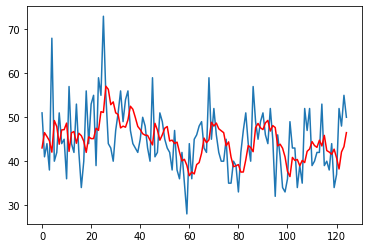

In [3]:
# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

series = read_csv(data, header=0, index_col=0, parse_dates=True, squeeze=True)

# split into train and test sets
X = series.values
X = X.astype('float32')
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:]
history = [x for x in train]
predictions = list()

# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

## Conduct the Grid Search On Parameters

In [4]:
# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

series = read_csv(data, header=0, index_col=0, parse_dates=True, squeeze=True)

# split into train and test sets
X = series.values
X = X.astype('float32')
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:]
history = [x for x in train]
predictions = list()
RSME = []
p=[1,2,3]
q=[0,1]
d=[1,2]

# walk-forward validation
for i1 in p:
  for i2 in q:
    for i3 in d:
      for t in range(len(test)):
        model = ARIMA(history, order=(i1,i3,i2))
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
  #print('predicted=%f, expected=%f' % (yhat, obs))  
    rmse = sqrt(mean_squared_error(test, predictions))
    history = [x for x in train]
    predictions = list()  
    RSME.append(rmse)
    print('Test RMSE: %.3f' % rmse,i1,i2,i3)   



Test RMSE: 8.106 1 0 1
Test RMSE: 11.968 1 0 2
Test RMSE: 7.340 1 1 1
Test RMSE: 8.120 1 1 2
Test RMSE: 7.700 2 0 1
Test RMSE: 10.355 2 0 2
Test RMSE: 7.332 2 1 1
Test RMSE: 7.714 2 1 2
Test RMSE: 7.568 3 0 1
Test RMSE: 9.457 3 0 2
Test RMSE: 7.370 3 1 1
Test RMSE: 7.581 3 1 2


## Using Best Paramter to perform train and also the walk-forward test

predicted=41.850220, expected=51.000000
95% Interval: 28.435 to 55.265
predicted=42.956971, expected=41.000000
95% Interval: 29.518 to 56.396
predicted=42.069171, expected=44.000000
95% Interval: 28.657 to 55.482
predicted=42.316362, expected=38.000000
95% Interval: 28.929 to 55.704
predicted=41.680087, expected=68.000000
95% Interval: 28.311 to 55.050
predicted=44.777942, expected=40.000000
95% Interval: 31.032 to 58.523
predicted=42.990562, expected=42.000000
95% Interval: 29.262 to 56.719
predicted=42.693683, expected=51.000000
95% Interval: 28.993 to 56.394
predicted=43.614879, expected=44.000000
95% Interval: 29.902 to 57.328
predicted=43.272013, expected=45.000000
95% Interval: 29.586 to 56.958
predicted=43.344800, expected=36.000000
95% Interval: 29.685 to 57.005
predicted=42.506293, expected=57.000000
95% Interval: 28.845 to 56.167
predicted=44.140318, expected=44.000000
95% Interval: 30.389 to 57.892
predicted=43.685756, expected=42.000000
95% Interval: 29.961 to 57.410
predic

predicted=42.297495, expected=44.000000
95% Interval: 28.583 to 56.012
predicted=42.968392, expected=34.000000
95% Interval: 29.272 to 56.665
predicted=41.740206, expected=37.000000
95% Interval: 28.031 to 55.450
predicted=41.447755, expected=52.000000
95% Interval: 27.748 to 55.147
predicted=43.724239, expected=48.000000
95% Interval: 30.002 to 57.447
predicted=44.020317, expected=55.000000
95% Interval: 30.310 to 57.731
predicted=45.172726, expected=50.000000
95% Interval: 31.436 to 58.910
Test RMSE: 7.332


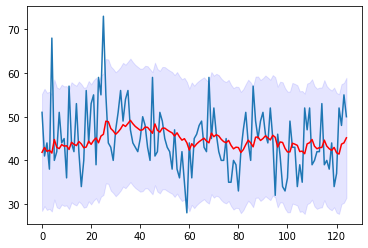

In [5]:
# evaluate an ARIMA model using a walk-forward validation
import numpy as np
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

series = read_csv(data, header=0, index_col=0, parse_dates=True, squeeze=True)

# split into train and test sets
X = series.values
X = X.astype('float32')
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:]
history = [x for x in train]
predictions = list()
best_parameter = [2,1,1]
confidence_interval = []

# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(best_parameter[0],best_parameter[1],best_parameter[2]))
    model_fit = model.fit()
    output = model_fit.get_forecast()
    yhat = output.predicted_mean
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
    ci = output.conf_int(0.05)
    confidence_interval.append(ci[0])
    print('95%% Interval: %.3f to %.3f' % (ci[0,0], ci[0,1]))
    
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# plot forecasts against actual outcomes and also the confidence int at 95%
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.fill_between(list(range(len(test))),
                 np.array(confidence_interval)[:,0], np.array(confidence_interval)[:,1],
                alpha=0.1, color='b')
pyplot.show()